In [ ]:
# 铅钡因子分析

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo
params = {
    "font.sans-serif":"Simhei",
    "axes.titlesize": 22,
    "legend.fontsize": 16,
    "figure.figsize": (10, 8),
    "figure.dpi":80,
    "axes.labelsize": 16,
    "axes.titlesize": 16,
    "xtick.labelsize": 16,
    "ytick.labelsize": 16,
    "figure.titlesize": 22,
    "axes.unicode_minus": False
}
plt.rcParams.update(params)

In [2]:
df=pd.read_excel("4.1铅钡.xlsx",index_col=0).iloc[:,1:]

# 根据VIF去除变量
df = df.drop(['氧化钙(CaO)', '氧化铜(CuO)', '氧化铅(PbO)', '氧化钡(BaO)', '氧化锶(SrO)', '二氧化硫(SO2)'], axis=1)

data=df # factor_analyzer库会自动标准化的

In [3]:
# 检验数据是否适合做因子分析
## Bartlett's球状检验
# $H_0$原假设：相关系数矩阵是一个单位矩阵（不适合做因子分析）  
# $H_1$备择假设：相关系数矩阵不是单位矩阵（适合做因子分析）


In [4]:
pd.DataFrame(calculate_bartlett_sphericity(data),index=["卡方统计量","p值"],columns=["Bartlett's球状检验"])

,Bartlett's球状检验
卡方统计量,8.673597e+01
p值,6.362202e-08


In [5]:
# p值<0.05，说明在95%的置信水平上拒绝原假设，我们认为数据适合做因子分析

In [6]:
# # 碎石检验选择因子个数
# 如果不知道因子个数则需要选择，如果有既定的则不需要选

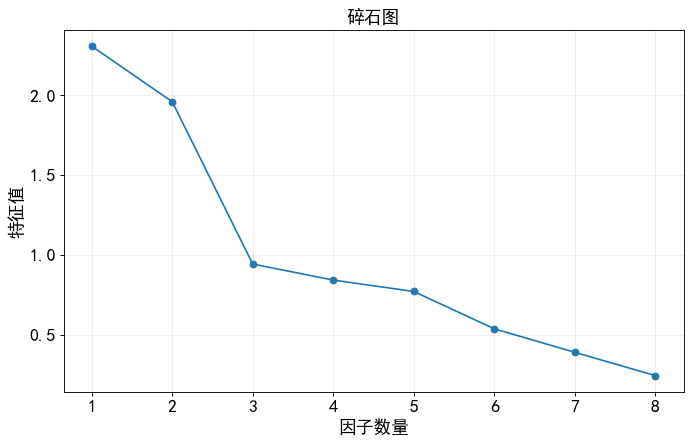

In [7]:
# 这里FactorAnalyzer参数暂时可以随便选
fa = FactorAnalyzer(n_factors=3,
                    method='minres',# minres:最小残差法 ml:Maximum Likelihood最大似然法 principle:主成分法
                    rotation=None)
fa.fit(data)
e,v=fa.get_eigenvalues() # 排序好的特征值和特征向量

plt.figure(figsize=(10,6),dpi=80)
plt.plot(range(1,len(data.columns)+1),e,marker="o")
plt.title("碎石图")  
plt.xlabel("因子数量")
plt.ylabel("特征值")
 
plt.grid(alpha=0.2)  # 显示网格
plt.show()  # 显示图形

# 进行因子分析

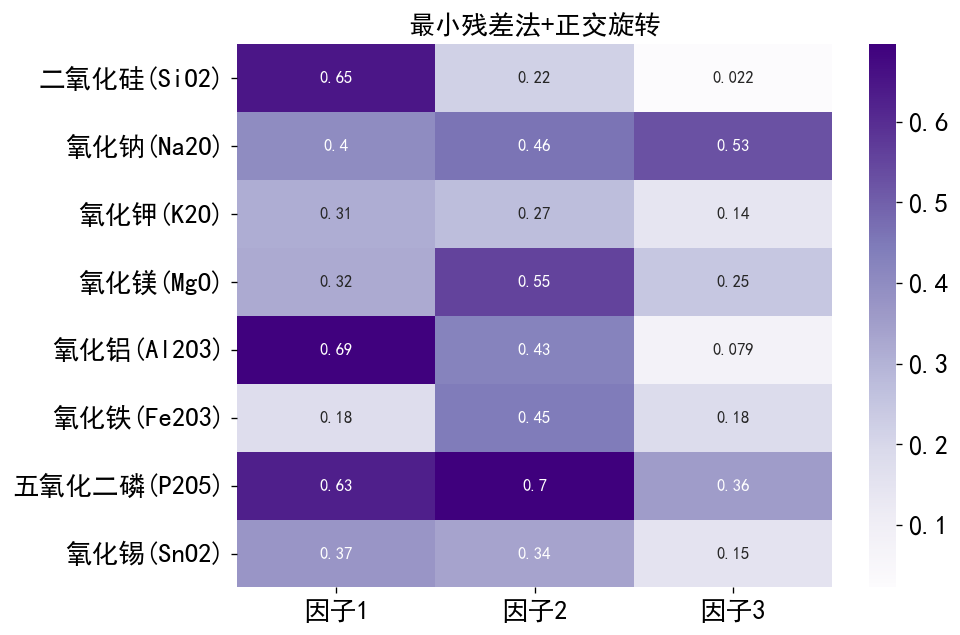

In [9]:
plt.figure(figsize=(8,6),dpi=120)
n_factors=3
# methods = ['minres','ml','principal']
methods = ['minres']
# methods=["principal"]
# rotations = ['varimax','promax','oblimin','oblimax','quartimin','quartimax','equamax','geomin_obl','geomin_ort']
rotations = ['oblimax']
for method in methods:
    for rotation in rotations:
        fa = FactorAnalyzer(n_factors=n_factors,
                            method=method,# minres:最小残差法 ml:Maximum Likelihood最大似然法 principal:主成分法
                            rotation=rotation)
        # 旋转方法：（一个一个试直到试到可解释性最强的系数）
        # varimax（正交旋转）、promax（倾斜旋转）、oblimin（倾斜旋转）、oblimax（正交旋转）、quartimin（斜向旋转）
        # quartimax（正交旋转）、equamax（正交旋转）、geomin_obl（倾斜旋转）、geomin_ort（正交旋转）
        fa.fit(data)
        factors=pd.DataFrame(fa.loadings_,index=df.columns,columns=[f"因子{i}" for i in range(1,n_factors+1)]) # 因子载荷矩阵（对应课件里P25成分矩阵）
        plt.title("最小残差法"+'+'+"正交旋转")
        sns.heatmap(factors.abs(),annot=True, cmap="Purples") # 绘制热力图便于直观看出
        plt.show()

# 高钾因子分析

In [14]:
df=pd.read_excel("4.1高钾.xlsx",index_col=0).iloc[:,1:]

df.drop(['氧化钾(K2O)', '氧化钙(CaO)', '氧化铝(Al2O3)', '氧化铁(Fe2O3)', '五氧化二磷(P2O5)', '氧化锶(SrO)'], axis=1,inplace=True)

data=df # factor_analyzer库会自动标准化的

In [15]:
pd.DataFrame(calculate_bartlett_sphericity(data),index=["卡方统计量","p值"],columns=["Bartlett's球状检验"])

,Bartlett's球状检验
卡方统计量,8.531428e+01
p值,1.051647e-07


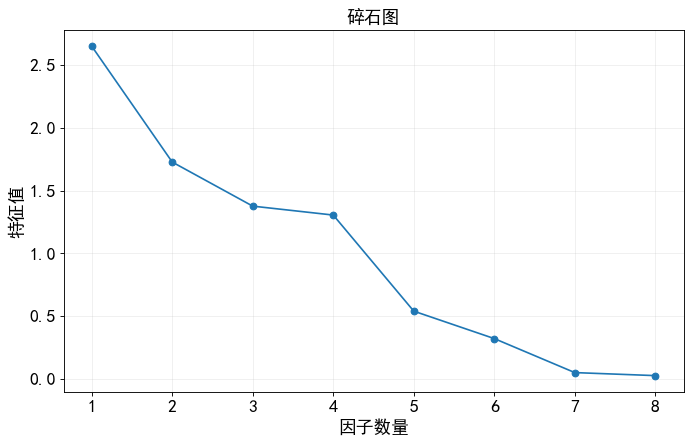

In [16]:
# 这里FactorAnalyzer参数暂时可以随便选
fa = FactorAnalyzer(n_factors=3,
                    method='minres',# minres:最小残差法 ml:Maximum Likelihood最大似然法 principle:主成分法
                    rotation=None)
fa.fit(data)
e,v=fa.get_eigenvalues() # 排序好的特征值和特征向量

plt.figure(figsize=(10,6),dpi=80)
plt.plot(range(1,len(data.columns)+1),e,marker="o")
plt.title("碎石图")  
plt.xlabel("因子数量")
plt.ylabel("特征值")
 
plt.grid(alpha=0.2)  # 显示网格
plt.show()  # 显示图形

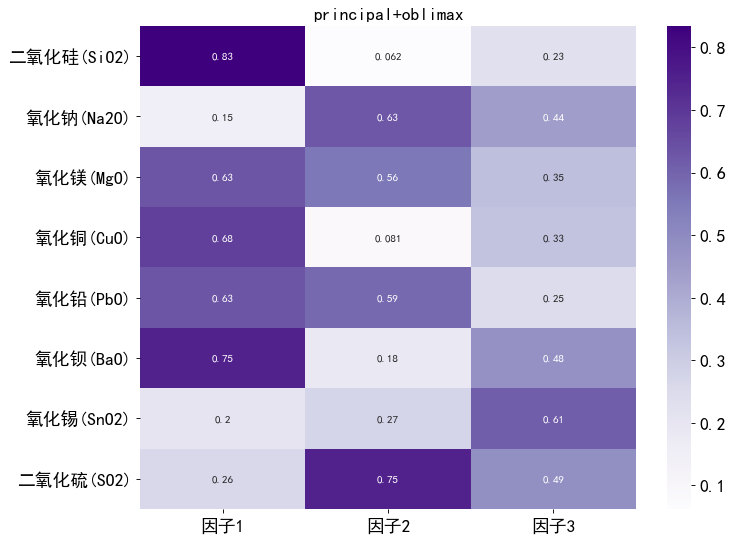

In [17]:
n_factors = 3
methods = ['principal']
# rotations = ['varimax','promax','oblimin','oblimax','quartimin','quartimax','equamax','geomin_obl','geomin_ort']
rotations = ['oblimax']
for method in methods:
    for rotation in rotations:
        fa = FactorAnalyzer(n_factors=n_factors,
                            method=method,# minres:最小残差法 ml:Maximum Likelihood最大似然法 principal:主成分法
                            rotation=rotation)
        # 旋转方法：（一个一个试直到试到可解释性最强的系数）
        # varimax（正交旋转）、promax（倾斜旋转）、oblimin（倾斜旋转）、oblimax（正交旋转）、quartimin（斜向旋转）
        # quartimax（正交旋转）、equamax（正交旋转）、geomin_obl（倾斜旋转）、geomin_ort（正交旋转）
        fa.fit(data)
        factors=pd.DataFrame(fa.loadings_,index=df.columns,columns=[f"因子{i}" for i in range(1,n_factors+1)]) # 因子载荷矩阵（对应课件里P25成分矩阵）
        plt.title(method+'+'+rotation)
        sns.heatmap(factors.abs(),annot=True, cmap="Purples") # 绘制热力图便于直观看出
        plt.show()